In [28]:
import sys
print(sys.version)
from qiskit import IBMQ

#IBMQ.enable_account(TOKEN) #Enable your account in the current session
#IBMQ.save_account(TOKEN) #Save your account to disk for future use.

IBMQ.load_account() # Load account from disk
providers = IBMQ.providers()   # List all available providers
for provider in providers:
    print(f'===provider=== {provider}')

provider = IBMQ.get_provider(hub='ibm-q')
backends = provider.backends()
for backend in backends:
    print(f'===backend=== {backend}')
    
backend = provider.get_backend('ibmq_16_melbourne')

3.6.6 (v3.6.6:4cf1f54eb7, Jun 27 2018, 03:37:03) [MSC v.1900 64 bit (AMD64)]


c:\users\ryans\source\repos\quantumplay\venv\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


===provider=== <AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>
===backend=== ibmq_qasm_simulator
===backend=== ibmqx2
===backend=== ibmq_16_melbourne
===backend=== ibmq_vigo
===backend=== ibmq_ourense
===backend=== ibmq_london
===backend=== ibmq_burlington
===backend=== ibmq_essex


In [10]:
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

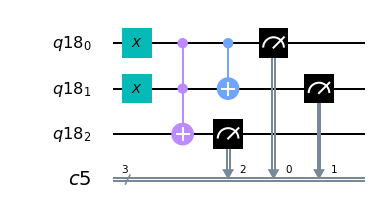

In [27]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
#circuit.draw()
circuit.draw(output="mpl")

In [19]:
job = execute(circuit, backend, shots=200)
job_monitor(job)

Job Status: job has successfully run


Result(backend_name='ibmq_16_melbourne', backend_version='1.1.0', date=datetime.datetime(2019, 12, 8, 5, 54, 45, tzinfo=datetime.timezone.utc), execution_id='36d5e566-197f-11ea-afb6-60a44c62b5b4', header=Obj(backend_name='ibmq_16_melbourne', backend_version='1.0.0'), job_id='unknown', qobj_id='f482bc42-e893-4514-9ff4-0d3220a83e19', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=5, 0x1=51, 0x2=13, 0x3=6, 0x4=12, 0x5=95, 0x6=12, 0x7=6)), header=Obj(clbit_labels=[['c3', 0], ['c3', 1], ['c3', 2]], creg_sizes=[['c3', 3]], memory_slots=3, n_qubits=14, name='circuit3', qreg_sizes=[['q', 14]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13]]), meas_level=2, shots=200, success=True)], status='Successful completion', success=True)


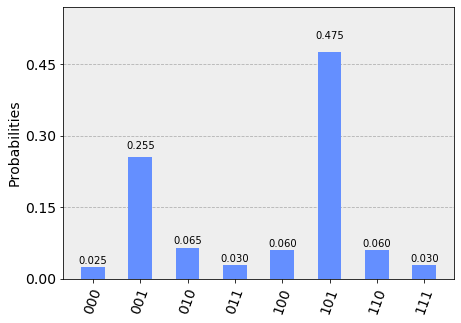

In [25]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)
print(result)
plot_histogram([counts])